In [18]:
import seaborn as sns
import pandas as pd
import numpy as np
import ensembles

# Предобработка данных

In [4]:
data = pd.read_csv('kc_house_data.csv')

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
data.corr(numeric_only=True)['price']

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

Удалим колонку id так как она не влияет на ответ

In [9]:
data = data.drop(['id'], axis=1)

Преобразуем колонку data в datatime и добавим категориальные признаки день, месяц и год

In [10]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data = data.drop("date",axis=1)

In [11]:
data.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9


In [14]:
y = np.array(data['price'])
X = np.array(data.drop(['price'], axis=1))

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Исследование случайного леса

In [21]:
import matplotlib
import matplotlib.pyplot as plt
import time
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

## Количество деревьев в ансамбле

In [42]:
max_depth = [1, 3, 5, 7, 10, None]
features = [0.1, 0.5, 1, None]

In [82]:
score_1 = np.zeros((4, 3, 100))
time_1 = np.zeros((4, 3, 100))

for i in range(len(max_depth)):
    for j in range(len(features)):
        r = ensembles.RandomForestMSE(n_estimators=100, max_depth=max_depth[i], feature_subsample_size=features[j])
        score_1[i, j], time_1[i, j] = r.fit(X_train, y_train, X_test, y_test, False)
        

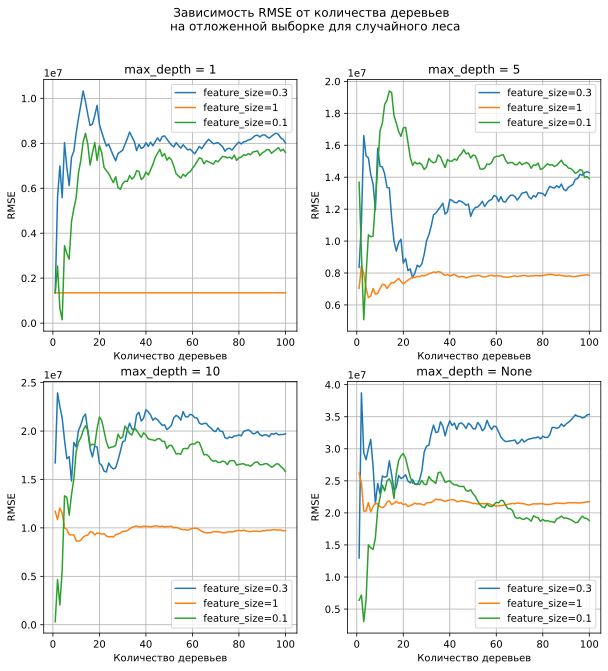

In [147]:
fig = plt.figure(figsize=(10,10))
plt.suptitle('Зависимость RMSE от количества деревьев \n на отложенной выборке для случайного леса')

for i in range(len(max_depth)):
        plt.subplot(2, 2, i+1)
        plt.title(f'max_depth = {max_depth[i]}')
        plt.plot(np.arange(1, 101), score_1[i, 1], label=f'feature_size={features[1]}')
        plt.xlabel('Количество деревьев')
        plt.ylabel('RMSE')
        plt.grid(True) 
        plt.legend()
        plt.plot(np.arange(1, 101), score_1[i, 2], label=f'feature_size={features[2]}')
        plt.plot(np.arange(1, 101), score_1[i, 0], label=f'feature_size={features[0]}')
        plt.legend()
plt.show()

fig.savefig('ex1_1.pdf', bbox_inches='tight')

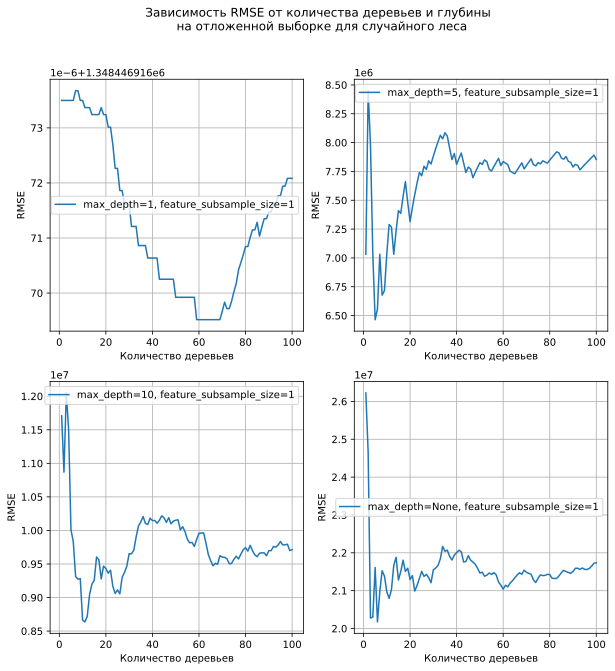

In [140]:
fig = plt.figure(figsize=(10,10))
plt.suptitle('Зависимость RMSE от количества деревьев и глубины \n на отложенной выборке для случайного леса')

for i in range(len(max_depth)):
        plt.subplot(2, 2, i+1)
        plt.plot(np.arange(1, 101), score_1[i, 2], label=f'max_depth={max_depth[i]}, feature_subsample_size={features[2]}')
        plt.xlabel('Количество деревьев')
        plt.ylabel('RMSE')
        plt.grid(True) 
        plt.legend()
plt.show()

fig.savefig('ex1_5.pdf', bbox_inches='tight')

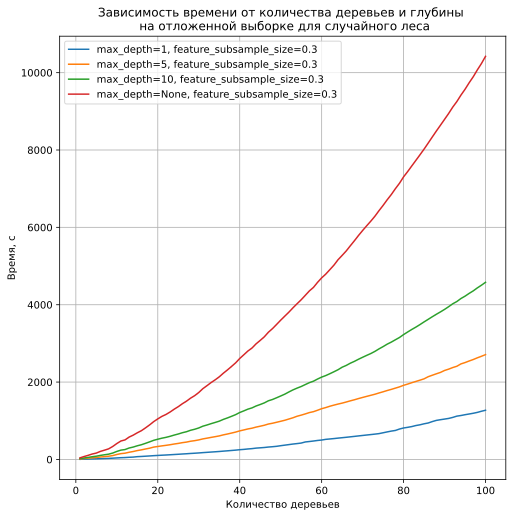

In [182]:
fig = plt.figure(figsize=(8,8))
plt.title('Зависимость времени от количества деревьев и глубины \n на отложенной выборке для случайного леса')

for i in range(len(max_depth)):
        plt.plot(np.arange(1, 101), time_1[i, 1], label=f'max_depth={max_depth[i]}, feature_subsample_size={features[1]}')
        plt.xlabel('Количество деревьев')
        plt.ylabel('Время, с')
        plt.grid(True) 
        plt.legend()
plt.show()

fig.savefig('ex1_2.pdf', bbox_inches='tight')

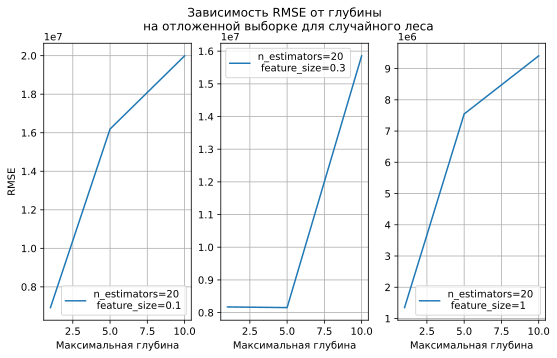

In [183]:
fig = plt.figure(figsize=(9, 5))
plt.suptitle('Зависимость RMSE от глубины \n на отложенной выборке для случайного леса')

for i in range(len(features)):
    plt.subplot(1, 3, i+1)
    plt.plot(max_depth[:-1], score_1[:, i, 21][:-1], label=f'n_estimators={20} \n feature_size={features[i]}')
    plt.xlabel('Максимальная глубина')
    if i == 0:
        plt.ylabel('RMSE')
    plt.grid(True) 
    plt.legend()
plt.show()

fig.savefig('ex1_3.pdf', bbox_inches='tight')

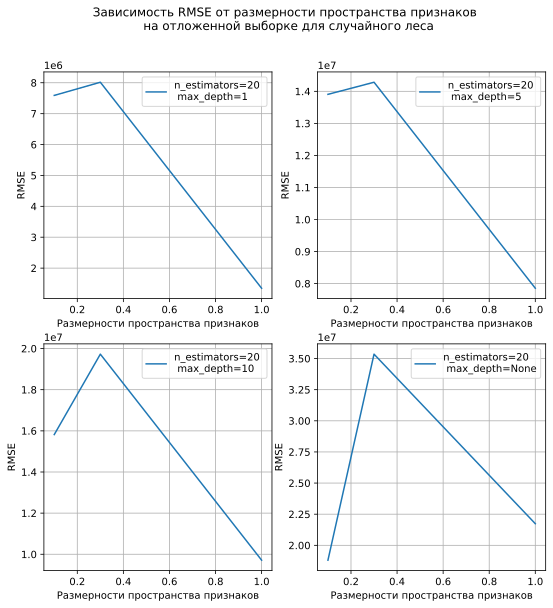

In [180]:
fig = plt.figure(figsize=(9, 9))
plt.suptitle('Зависимость RMSE от размерности пространства признаков \n на отложенной выборке для случайного леса')

for i in range(len(max_depth)):
    plt.subplot(2, 2, i+1)
    plt.plot(features, score_1[i, :, 99], label=f'n_estimators={20} \n max_depth={max_depth[i]}')
    plt.xlabel('Pазмерности пространства признаков')
    plt.ylabel('RMSE')
    plt.grid(True) 
    plt.legend()
plt.show()

fig.savefig('ex1_4.pdf', bbox_inches='tight')

# Бустинг

In [16]:
max_depth = [1, 5, 10, None]
features = [0.1, 0.3, 1]
learning_rate=[0.1, 0.5, 1]

In [19]:
score_2 = np.zeros((len(max_depth), len(features), len(learning_rate), 100))
t_2 = np.zeros((len(max_depth), len(features), len(learning_rate), 100))
for i in range(len(max_depth)):
    for j in range(len(features)):
        for k in range(len(learning_rate)):
            r = ensembles.GradientBoostingMSE(n_estimators=100, max_depth=max_depth[i], 
                                          feature_subsample_size=features[j], learning_rate=learning_rate[k])
            score_2[i, j, k, :], t_2[i, j, k, :] = r.fit(X_train, y_train, X_test, y_test)

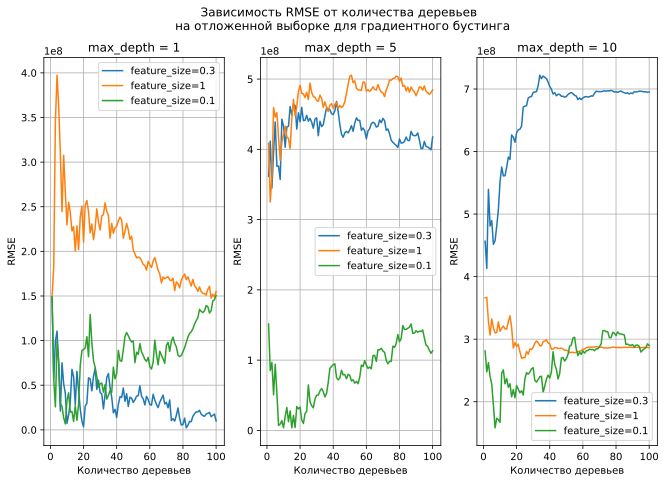

In [46]:
fig = plt.figure(figsize=(11,7))
plt.suptitle('Зависимость RMSE от количества деревьев \n на отложенной выборке для градиентного бустинга')

for i in range(len(max_depth) - 1):
        plt.subplot(1, 3, i+1)
        plt.title(f'max_depth = {max_depth[i]}')
        plt.plot(np.arange(1, 101), score_2[i, 1, 0], label=f'feature_size={features[1]}')
        plt.xlabel('Количество деревьев')
        plt.ylabel('RMSE')
        plt.grid(True) 
        plt.legend()
        plt.plot(np.arange(1, 101), score_2[i, 2, 0], label=f'feature_size={features[2]}')
        plt.plot(np.arange(1, 101), score_2[i, 0, 0], label=f'feature_size={features[0]}') 
        plt.legend()
plt.show()

fig.savefig('ex2_1.pdf', bbox_inches='tight')

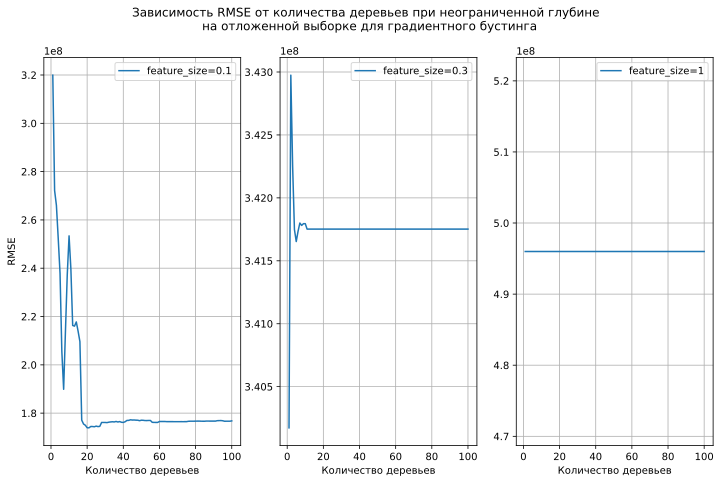

In [23]:
fig = plt.figure(figsize=(12,7))
plt.suptitle('Зависимость RMSE от количества деревьев при неограниченной глубине \n на отложенной выборке для градиентного бустинга')

for i in range(len(features)):
        plt.subplot(1, 3, i+1)
        #plt.title(f'max_depth = {max_depth[i]}')
        plt.plot(np.arange(1, 101), score_2[-1, i, 0], label=f'feature_size={features[i]}')
        plt.xlabel('Количество деревьев')
        if i == 0:
            plt.ylabel('RMSE')
        plt.grid(True) 
        plt.legend()
plt.show()

fig.savefig('ex2_2.pdf', bbox_inches='tight')

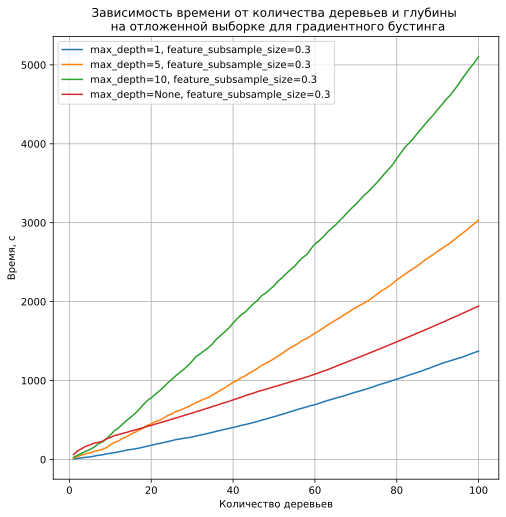

In [36]:
fig = plt.figure(figsize=(8,8))
plt.title('Зависимость времени от количества деревьев и глубины \n на отложенной выборке для градиентного бустинга')

for i in range(len(max_depth)):
        plt.plot(np.arange(1, 101), t_2[i, 1, 0], label=f'max_depth={max_depth[i]}, feature_subsample_size={features[1]}')
        plt.xlabel('Количество деревьев')
        plt.ylabel('Время, с')
        plt.grid(True) 
        plt.legend()
plt.show()

fig.savefig('ex2_3.pdf', bbox_inches='tight')

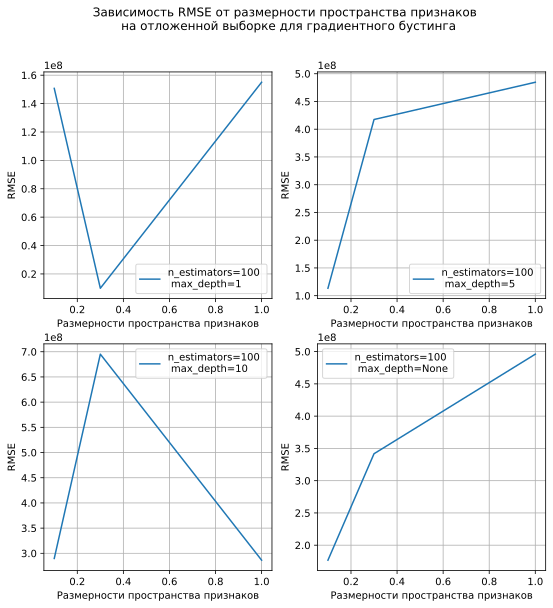

In [35]:
fig = plt.figure(figsize=(9, 9))
plt.suptitle('Зависимость RMSE от размерности пространства признаков \n на отложенной выборке для градиентного бустинга')

for i in range(len(max_depth)):
    plt.subplot(2, 2, i+1)
    plt.plot(features, score_2[i, :, 0, 99], label=f'n_estimators={100} \n max_depth={max_depth[i]}')
    plt.xlabel('Pазмерности пространства признаков')
    plt.ylabel('RMSE')
    plt.grid(True) 
    plt.legend()
plt.show()

fig.savefig('ex2_4.pdf', bbox_inches='tight')

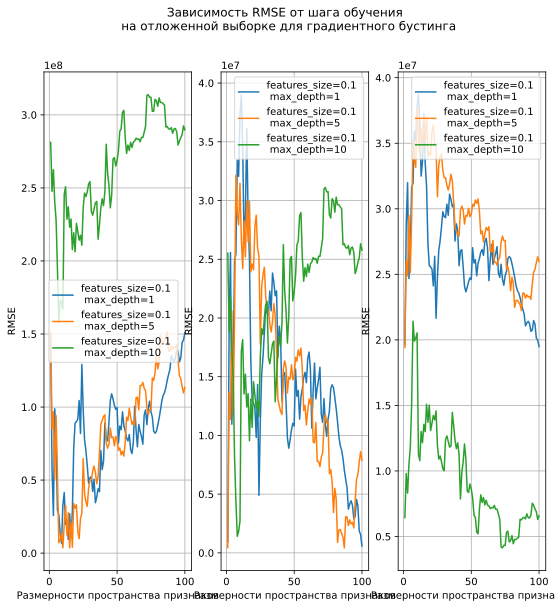

In [34]:
fig = plt.figure(figsize=(9, 9))
plt.suptitle('Зависимость RMSE от шага обучения \n на отложенной выборке для градиентного бустинга')

for i in range(len(learning_rate)):
    plt.subplot(1, 3, i+1)
    plt.plot(np.arange(1, 101), score_2[0, 0, i], label=f'features_size={features[0]} \n max_depth={max_depth[0]}')
    plt.plot(np.arange(1, 101), score_2[1, 0, i], label=f'features_size={features[0]} \n max_depth={max_depth[1]}')
    plt.plot(np.arange(1, 101), score_2[2, 0, i], label=f'features_size={features[0]} \n max_depth={max_depth[2]}')
    plt.xlabel('Pазмерности пространства признаков')
    plt.ylabel('RMSE')
    plt.grid(True) 
    plt.legend()
plt.show()

fig.savefig('ex2_5.pdf', bbox_inches='tight')

In [30]:
l_r = [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9, 1]
score = []
t = []
for i in range(len(l_r)):
    r = ensembles.GradientBoostingMSE(n_estimators=100, feature_subsample_size=0.1, learning_rate=l_r[i])
    s, tm = r.fit(X_train, y_train, X_test, y_test)
    score.append(s[-1])
    t.append(tm[-1])

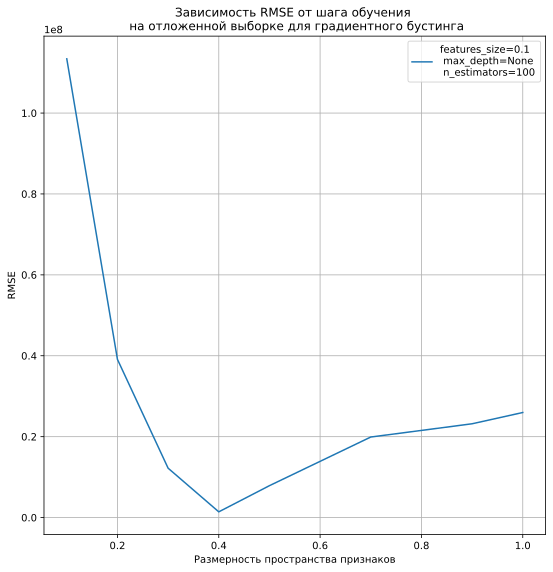

In [39]:
fig = plt.figure(figsize=(9, 9))
plt.title('Зависимость RMSE от шага обучения \n на отложенной выборке для градиентного бустинга')

plt.plot(l_r, score, label=f'features_size={features[0]} \n max_depth={max_depth[-1]} \n n_estimators=100')
plt.xlabel('Pазмерность пространства признаков')
plt.ylabel('RMSE')
plt.grid(True) 
plt.legend()
plt.show()

fig.savefig('ex2_6.pdf', bbox_inches='tight')

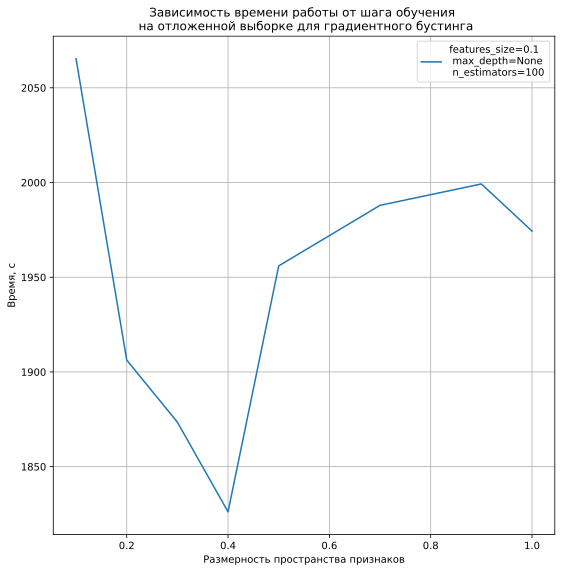

In [40]:
fig = plt.figure(figsize=(9, 9))
plt.title('Зависимость времени работы от шага обучения \n на отложенной выборке для градиентного бустинга')

plt.plot(l_r, t, label=f'features_size={features[0]} \n max_depth={max_depth[-1]} \n n_estimators=100')
plt.xlabel('Pазмерность пространства признаков')
plt.ylabel('Время, с')
plt.grid(True) 
plt.legend()
plt.show()

fig.savefig('ex2_7.pdf', bbox_inches='tight')

In [43]:
data.to_csv('train_data.csv')

In [45]:
pd.DataFrame(X).to_csv('test_data.csv')